# Import Package

In [ ]:
import psycopg2
import pandas as pd

from sqlalchemy import create_engine

# Load Connecting

In [ ]:
# Connection details
host_p=''
database_p=''
user_p=''
password_p=''
port_p = 5432

# #establishing the connection
conn = psycopg2.connect(database=database_p, user=user_p, password=password_p, host=host_p, port=port_p)
#Creating a cursor object using the cursor() method
conn.autocommit = True
cursor = conn.cursor()

connection_string = f'postgresql://{user_p}:{password_p}@{host_p}:{port_p}/{database_p}'
engine_postgresql = create_engine(connection_string)

# DDL (Database Definition Language)

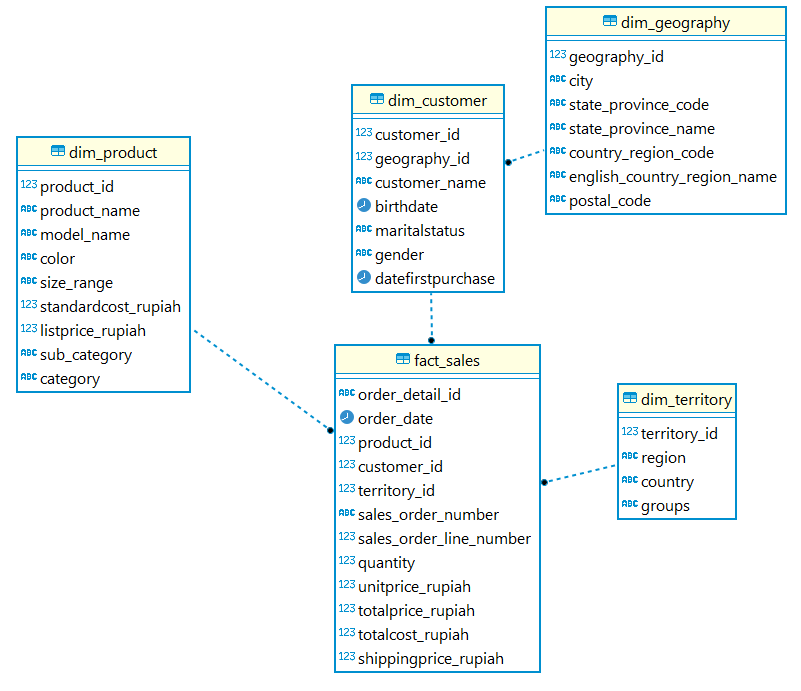

In [ ]:
schema = 'public'

In [ ]:
def show_table():
  q='''
    select table_name
    from information_schema.tables
    where table_schema = '{schema}'
  '''.format(schema=schema)
  return q

df = pd.read_sql(show_table(), engine_postgresql)
df.head()


table_name
0  dim_geography_dhafran
1     pg_stat_statements

## Create dim_geography

In [ ]:
def dim_geography():

  q='''
    create table dim_geography (
      geography_id int4 primary key,
      city varchar(50),
      state_province_code varchar(5),
      state_province_name varchar(50),
      country_region_code varchar(5),
      english_country_region_name varchar(50),
      postal_code varchar(10)
    )
  '''
  return q

cursor.execute(dim_geography())


In [ ]:
df = pd.read_sql(show_table(), engine_postgresql)
df.head()

table_name
0  dim_geography_dhafran
1     pg_stat_statements
2          dim_geography

## Create dim_territory

In [ ]:
def dim_territory():

  q='''
    create table dim_territory (
      territory_id int4 primary key,
      region varchar(50),
      country varchar(50),
      groups varchar(50)
    )
  '''
  return q

# cursor.execute(dim_territory())


In [ ]:
df = pd.read_sql(show_table(), engine_postgresql)
df.head()

table_name
0  dim_geography_dhafran
1     pg_stat_statements
2          dim_geography
3          dim_territory

## Create dim_product

In [ ]:
def dim_product():

  q='''
    create table dim_product (
      product_id int4 primary key,
      product_name varchar(50),
      model_name varchar(50),
      size_range varchar (50),
      color varchar(50),
      cost real,
      normal_price real,
      sub_category varchar(50),
      category varchar(50),
      disc int4
    )
  '''
  return q

# cursor.execute(dim_product())


In [ ]:
df = pd.read_sql(show_table(), engine_postgresql)
df.head()

table_name
0  dim_geography_dhafran
1     pg_stat_statements
2          dim_geography
3          dim_territory
4            dim_product

## Create dim_customer

In [ ]:
def dim_customer():

  q='''
    create table dim_customer (
      customer_id int4 primary key,
      geography_id int4 REFERENCES dim_geography(geography_id),
      customer_name varchar(50),
      birthdate varchar(50),
      maritalstatus varchar (50),
      gender varchar(50),
      datefirstpurchase varchar(50),
      age int4,
      grouping_age varchar(50)
    )
  '''
  return q

# cursor.execute(dim_customer())


In [ ]:
df = pd.read_sql(show_table(), engine_postgresql)
df.head()

table_name
0  dim_geography_dhafran
1          dim_geography
2           dim_customer
3     pg_stat_statements
4          dim_territory

## Create fact_sales

In [ ]:
def fact_sales():

  q='''
    create table fact_sales (
      order_detail_id varchar(50) primary key,
      order_date varchar(50),
      product_id int4 REFERENCES dim_product(product_id),
      customer_id int4 REFERENCES dim_customer(customer_id),
      territory_id int4 REFERENCES dim_territory(territory_id),
      sales_order_number varchar(50),
      sales_order_line_number int4,
      quantity int4,
      unitprice_rupiah real,
      totalprice_rupiah real,
      totalcost_rupiah real,
      shippingprice_rupiah real,
      omset real
    )
  '''
  return q

# cursor.execute(fact_sales())


In [ ]:
df = pd.read_sql(show_table(), engine_postgresql)
df

table_name
0  dim_geography_dhafran
1          dim_geography
2           dim_customer
3     pg_stat_statements
4            dim_product
5             fact_sales
6          dim_territory

# DML (Database Manipulation Language)

## INSERT


```
INSERT INTO table_name (column_list)
VALUES
    (value_list_1),
    (value_list_2),
    ...
    (value_list_n);
```

In this syntax:

* First, specify the **table's name** that you want to insert data after the INSERT INTO keywords.
* Second, list the required columns or all columns of the table in parentheses that follow the table name.
* Third, supply a comma-separated list of rows after the VALUES keyword.

Source [link text](https://www.postgresqltutorial.com/postgresql-insert/)

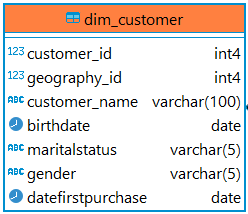

## Insert dim_territory

In [ ]:
def insert_dim_territory():
  q='''
      INSERT INTO dim_territory (territory_id,region,country,"groups") VALUES
        	(3,'Central','United States','North America'),
          (4,'Southwest','United States','North America'),
          (5,'Southeast','United States','North America'),
          (6,'Canada','Canada','North America'),
          (7,'France','France','Europe'),
          (8,'Germany','Germany','Europe'),
          (9,'Australia','Australia','Pacific'),
          (10,'United Kingdom','United Kingdom','Europe');
  '''
  return q

cursor.execute(insert_dim_territory())

In [ ]:
q_territory='''
  select * from public.dim_territory
'''

df = pd.read_sql(q_territory, engine_postgresql)
df

territory_id          region         country         groups
0              1       Northwest   United States  North America
1              2       Northeast   United States  North America
2              3         Central   United States  North America
3              4       Southwest   United States  North America
4              5       Southeast   United States  North America
5              6          Canada          Canada  North America
6              7          France          France         Europe
7              8         Germany         Germany         Europe
8              9       Australia       Australia        Pacific
9             10  United Kingdom  United Kingdom         Europe
10            11              NA              NA             NA